In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
data.MonthlyCharges = pd.to_numeric(data.MonthlyCharges)

In [7]:
 data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [8]:
data[data.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
data = data.drop(index=data.index[data.TotalCharges.isna()])

In [10]:
new_data = pd.get_dummies(data,columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'])

In [11]:
new_data.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One y

In [12]:
new_data = new_data.drop(['customerID','gender_Male', 'SeniorCitizen_0','Partner_No','Dependents_No','PhoneService_No','MultipleLines_No',
       'MultipleLines_No phone service','OnlineSecurity_No',
       'OnlineSecurity_No internet service','OnlineBackup_No', 'OnlineBackup_No internet service','DeviceProtection_No',
       'DeviceProtection_No internet service','TechSupport_No', 'TechSupport_No internet service','StreamingTV_No', 'StreamingTV_No internet service','StreamingMovies_No', 'StreamingMovies_No internet service','PaperlessBilling_No','Churn_No'],axis='columns')

In [33]:
new_data = new_data.rename({'InternetService_Fiber optic':'InternetService_Fiber_optic','Contract_Month-to-month':'Contract_Month_to_month','Contract_One year':'Contract_One_year','Contract_Two year':'Contract_Two_year','PaymentMethod_Bank transfer (automatic)':'PaymentMethod_Bank_transfer_automatic','PaymentMethod_Credit card (automatic)':'PaymentMethod_Credit_card_automatic','PaymentMethod_Electronic check':'PaymentMethod_Electronic_check','PaymentMethod_Mailed check':'PaymentMethod_Mailed_check'},axis='columns')

In [34]:
new_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Month_to_month', 'Contract_One_year', 'Contract_Two_year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check', 'Churn_Yes'],
      dtype='object')

# Explorotary Data Analysis

EDA helps in Visualizing underlying insights from the data. It helps in Feature Enginerring also paves way for identifying new scope of data. As churn is the key field of study,first part of the notebook deals with the picturization of churn data based on different features.

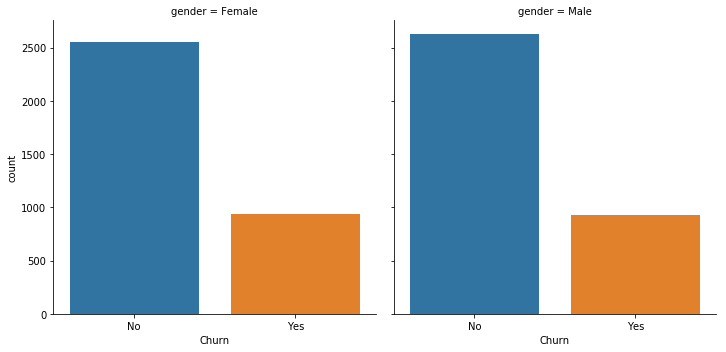

In [14]:
sns.catplot(x='Churn',col='gender',data = data,kind='count')

As from above chart churning rate looks similar for both male and female so there is __no significant difference in churning rate based on gender.__

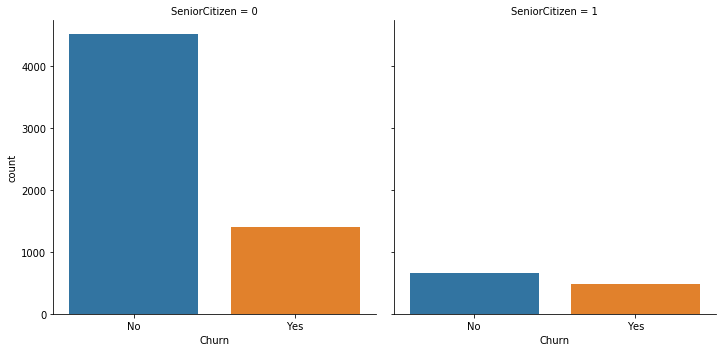

In [15]:
sns.catplot(x='Churn',col='SeniorCitizen',data = data,kind='count')

__It seems Senior citizens churned and not churned numbers have very less difference, also the number of Total Senior Citizens is less compared to remaining population.__

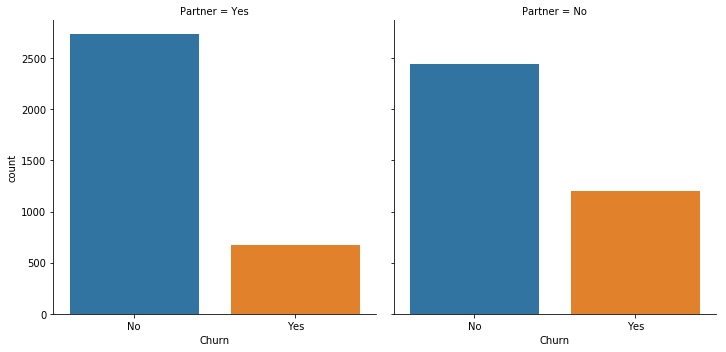

In [16]:
sns.catplot(x='Churn',col='Partner',data = data,kind='count')


__If there is no partner then churn rate is little higher.__

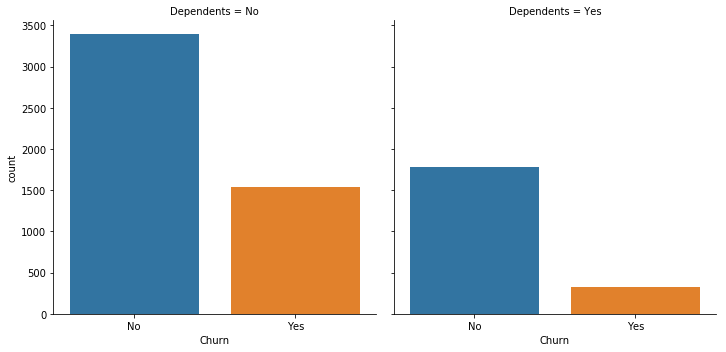

In [22]:
sns.catplot(x='Churn',col='Dependents',data = data,kind='count')

__If there are no Dependents then Churning numbers are higher__

In [23]:
data.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Nearly only half of the total customers have Dependents, when there are dependents then churn rate is little less. It can be one of the feature can be considered but not very much primary.

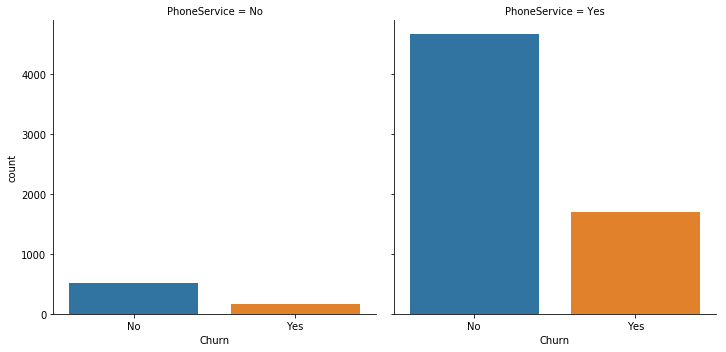

In [20]:
sns.catplot(x='Churn',col='PhoneService',data = data,kind='count')

In [24]:
data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Most of the Telcom customers have Phone service too, __Nearly 10% of them Phone Service customers are churned__

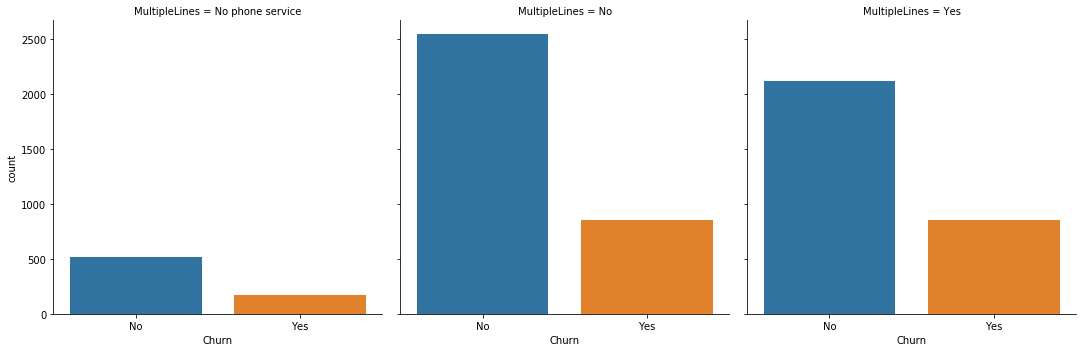

In [9]:
sns.catplot(x='Churn',col='MultipleLines',data = data,kind='count')

__Irrespective of customer have multiple lines or not the Churning numbers are same.__

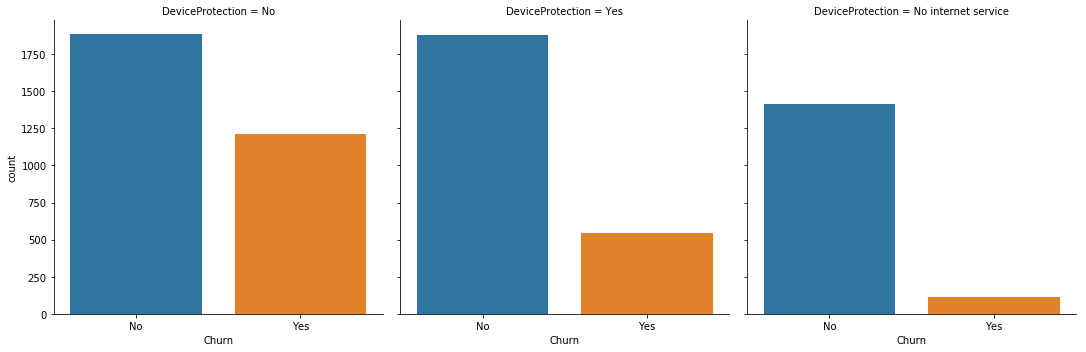

In [8]:
sns.catplot(x='Churn',col='DeviceProtection',data = data,kind='count')

__Customer without device protection churned higher__

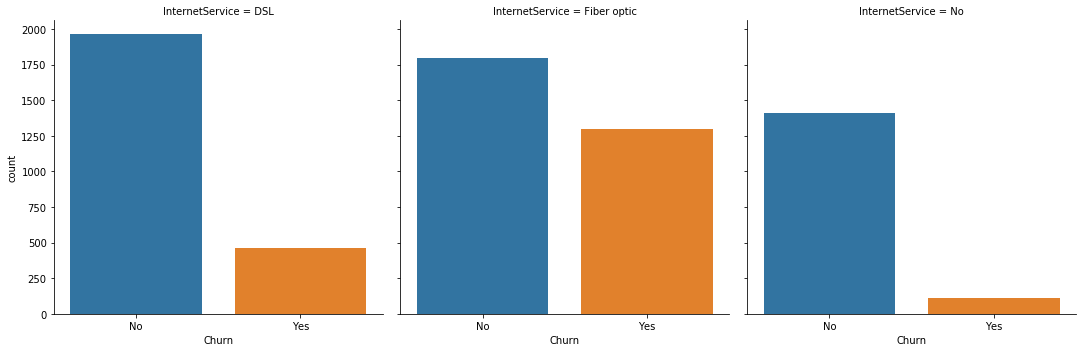

In [10]:
sns.catplot(x='Churn',col='InternetService',data = data,kind='count')

__Customers getting Internet Service by Fiber optics Churned more, so definetly that may be a important feature.__

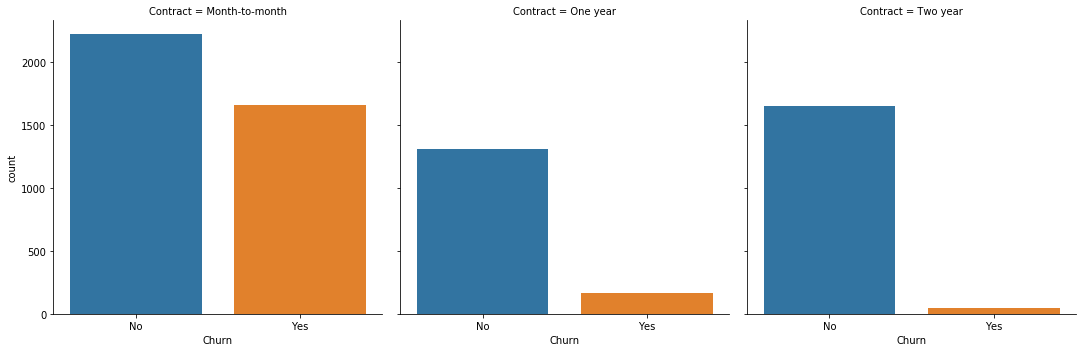

In [11]:
sns.catplot(x='Churn',col='Contract',data = data,kind='count')

__Customers chosen Month-to-month contract churned higher,this also may be a important feature__

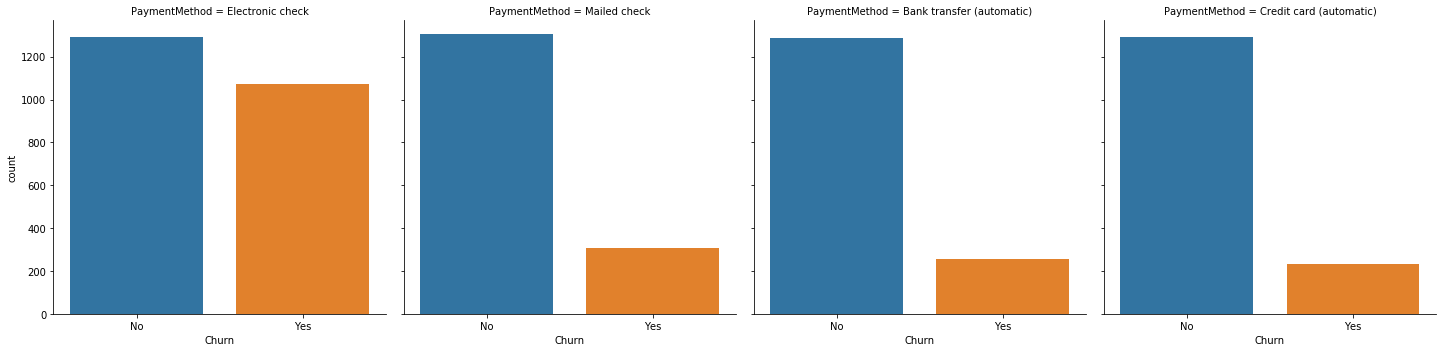

In [12]:
sns.catplot(x='Churn',col='PaymentMethod',data = data,kind='count')

__Customer paid by electronic check churned more__

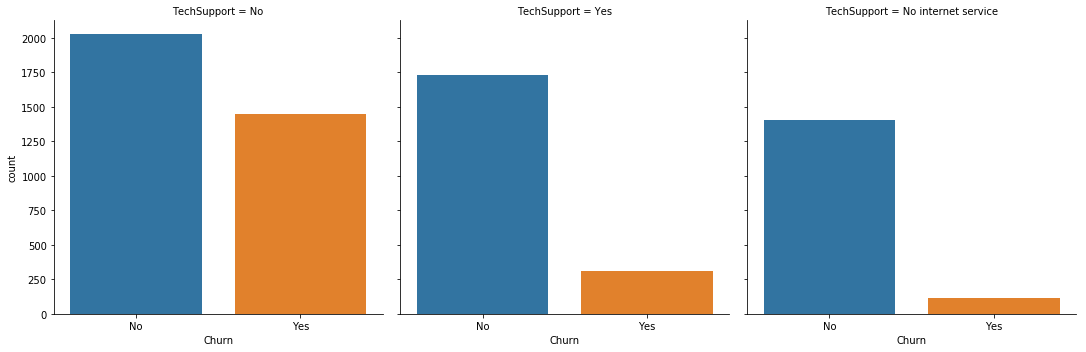

In [16]:
sns.catplot(x='Churn',col='TechSupport',data = data,kind='count')

__Customer without tech support churned higher than customer with tech support__

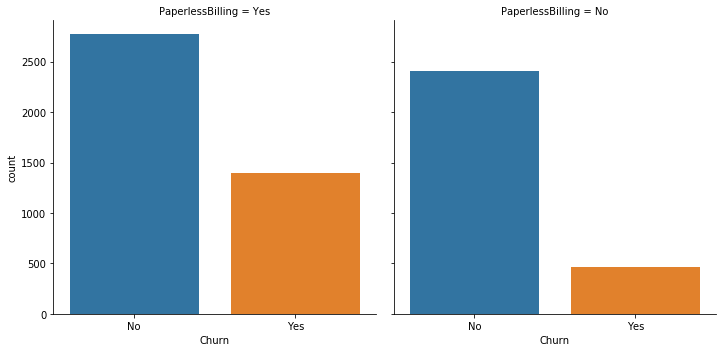

In [19]:
sns.catplot(x='Churn',col='PaperlessBilling',data = data,kind='count')

__Churning rate of paperless billing customer are greater than the billing sent by post customers__

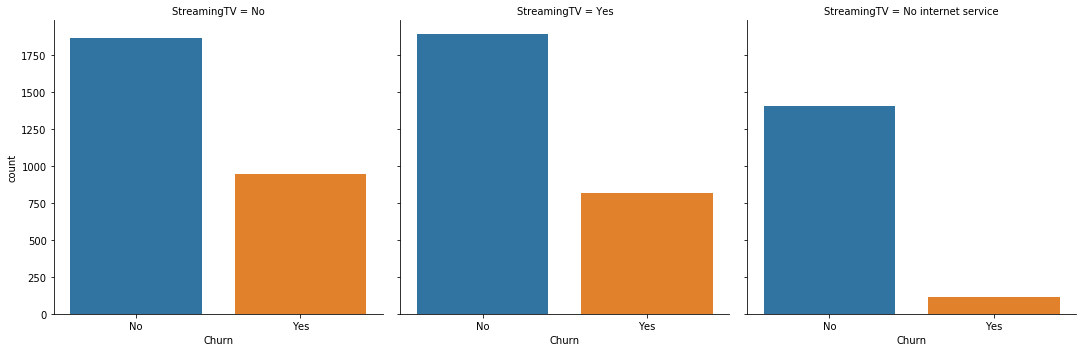

In [36]:
sns.catplot(x='Churn',col='StreamingTV',data = data,kind='count')

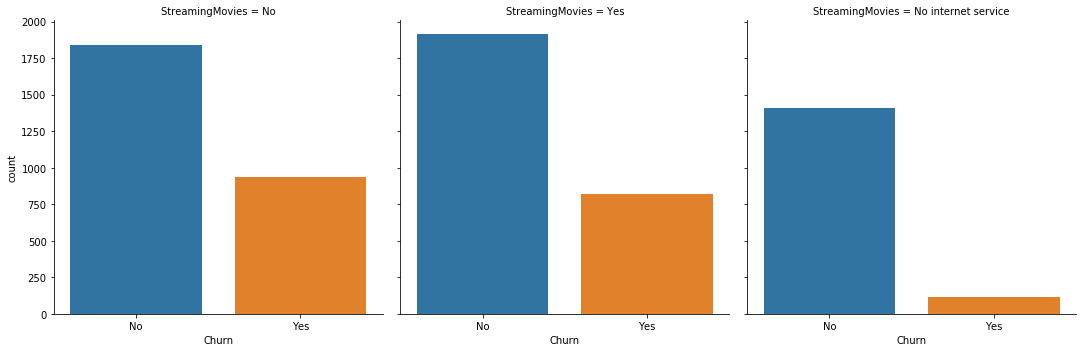

In [37]:
sns.catplot(x='Churn',col='StreamingMovies',data = data,kind='count')


__Both Streaming Tv and Streaming Movies have greater churn rate__

# Feature Engineering

From EDA __Internet Service,Contract,Payment Method,Streaming Tv and Streaming Movies,Tech Support are the Primary features and Paperless billing and Senior Citizen can be of secondary importance.__

In [31]:
new_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One_year', 'Contract_Two_year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check', 'Churn_Yes'],
      dtype='object')

In [35]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
m = ols('Churn_Yes ~ gender_Female + tenure + MonthlyCharges + TotalCharges + SeniorCitizen_1 + Partner_Yes + Dependents_Yes + PhoneService_Yes + MultipleLines_Yes + InternetService_Fiber_optic + InternetService_DSL + InternetService_No + OnlineSecurity_Yes + OnlineBackup_Yes +DeviceProtection_Yes + TechSupport_Yes+ StreamingTV_Yes + StreamingMovies_Yes + Contract_Month_to_month + Contract_One_year+ Contract_Two_year + PaperlessBilling_Yes + PaymentMethod_Credit_card_automatic + PaymentMethod_Electronic_check + PaymentMethod_Mailed_check',new_data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              Churn_Yes   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     120.9
Date:                Tue, 18 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:35:50   Log-Likelihood:                -3057.9
No. Observations:                7032   AIC:                             6164.
Df Residuals:                    7008   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

__From above table Internet Service - Fiber optic,Contract month to Month,Payment by check,Streaming Tv,Streaming Movies,Multiple Lines,Internet Service DSL,Paperlessbilling,Contract by two year,Senior Citizen have coefficients in positive__

In [42]:
y = new_data['Churn_Yes'].values
X = new_data.drop(['Churn_Yes'], axis=1).values

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   43.3s finished

[2018-09-18 10:50:22] Features: 1/5 -- score: 0.7513252705090581[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   51.4s finished

[2018-09-18 10:51:13] Features: 2/5 -- score: 0.7891097315164196[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   50.4s finished

[2018-09-18 10:52:04] Features: 3/5 -- score: 0.7929735878050336[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   48.0s finished

[2018-09-18 10:52:52] Features: 4/5 -- score: 0.7905360078454775[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[0, 9, 10, 11, 20]


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   45.9s finished

[2018-09-18 10:53:38] Features: 5/5 -- score: 0.790941272987408

In [46]:
new_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Month_to_month', 'Contract_One_year', 'Contract_Two_year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check', 'Churn_Yes'],
      dtype='object')